In [3]:
import pandas as pd

# Load your dataset
df = pd.read_excel("C:/Users/HP/Downloads/preprocessed_for_random_forest.xlsx")

# Drop rows where all elements are missing (empty rows)
df_cleaned = df.dropna(how='all')

# Optional: Reset index after dropping
df_cleaned = df_cleaned.reset_index(drop=True)

# Save cleaned dataset
df_cleaned.to_excel("your_file_cleaned2.xlsx", index=False)

print("Empty rows removed and file saved as your_file_cleaned.xlsx")


Empty rows removed and file saved as your_file_cleaned.xlsx


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Results saved to model_comparison_results.xlsx


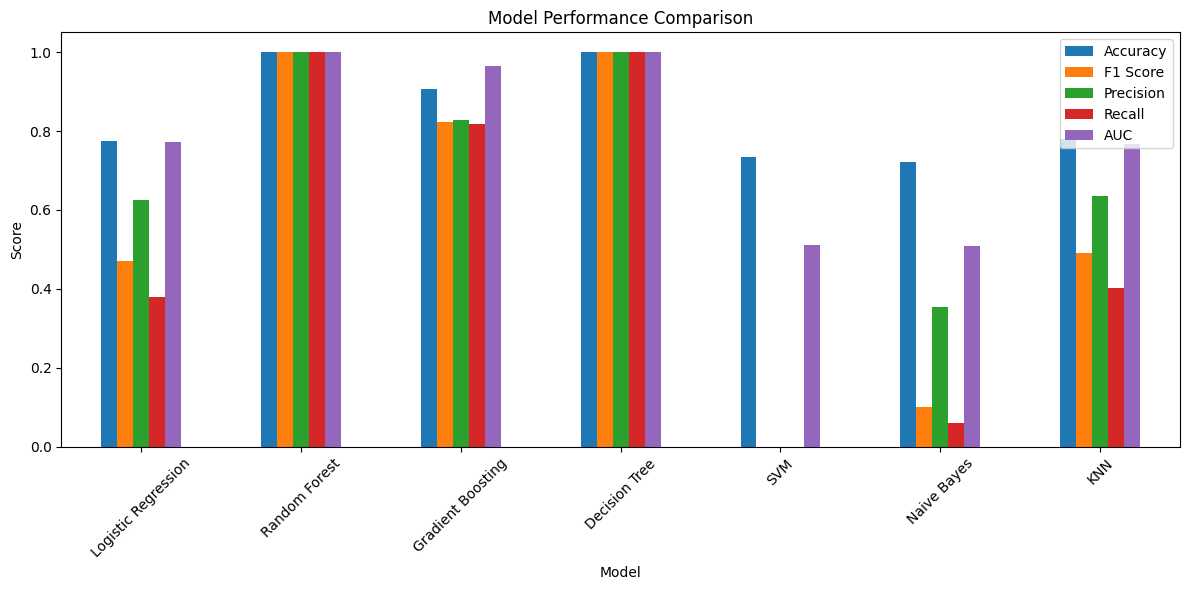

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load datasets
train_df = pd.read_excel("your_file_cleaned2.xlsx")
test_df = pd.read_excel("your_file_cleaned.xlsx")

# Encode categorical variables (including Gender)
def preprocess(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Fill missing values
train_df = train_df.fillna(train_df.mean(numeric_only=True))
test_df = test_df.fillna(test_df.mean(numeric_only=True))

# Also fill remaining (non-numeric) NaNs with mode
train_df = train_df.fillna(train_df.mode().iloc[0])
test_df = test_df.fillna(test_df.mode().iloc[0])

# Identify target
target_col = 'Fraud' if 'Fraud' in train_df.columns else 'Fraud_Ind'

# Split features and targets
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    auc = roc_auc_score(y_test, probs) if probs is not None else None
    error_rate = 1 - acc

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc,
        'Error Rate': error_rate
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_excel("model_comparison_results.xlsx", index=False)
print("✅ Results saved to model_comparison_results.xlsx")

# Plot performance metrics
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_comparison_plot.png")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9108\3606545172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


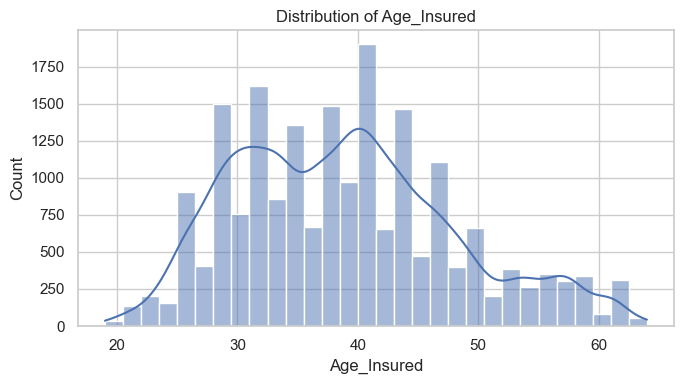

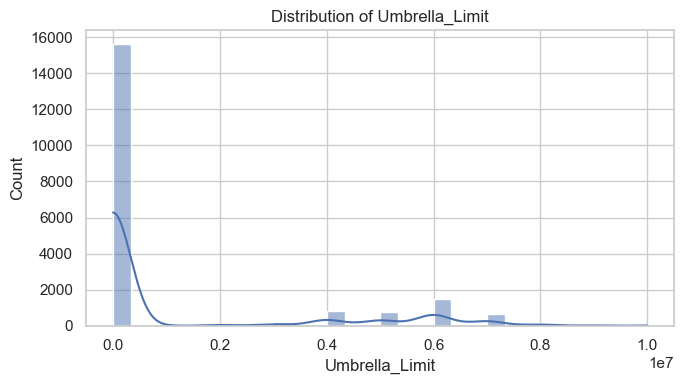

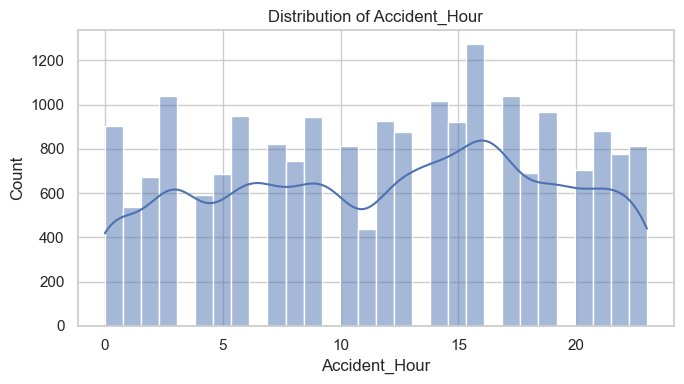

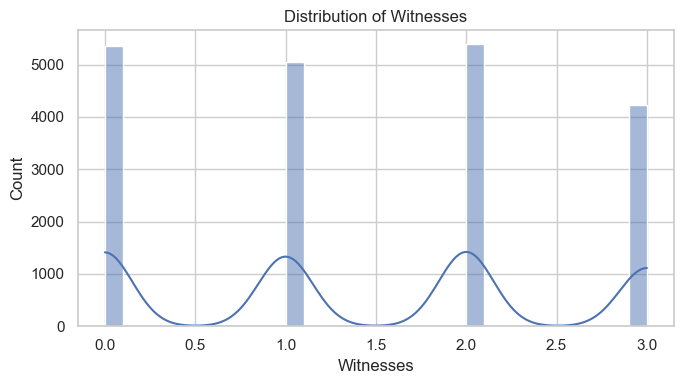

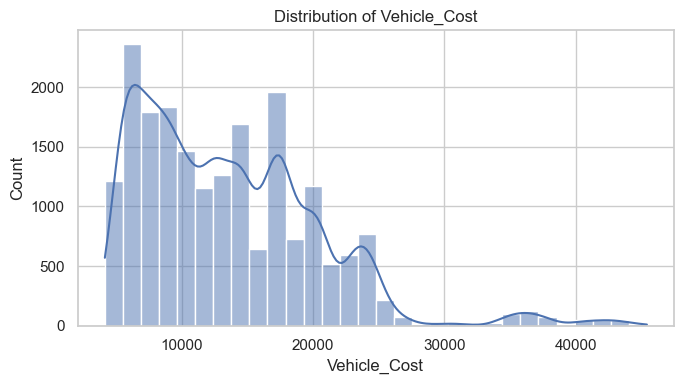

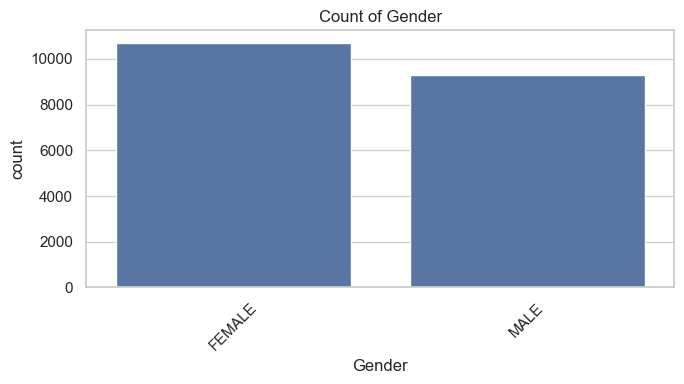

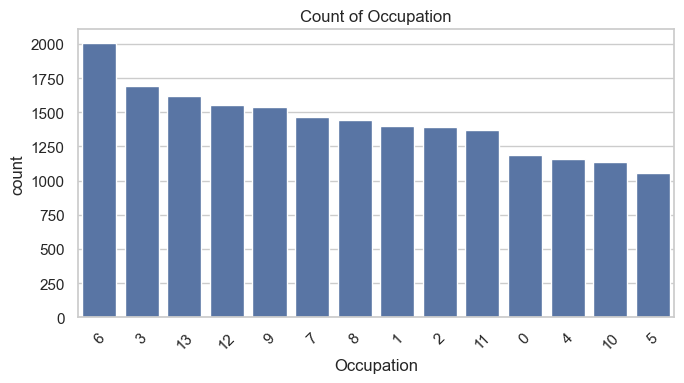

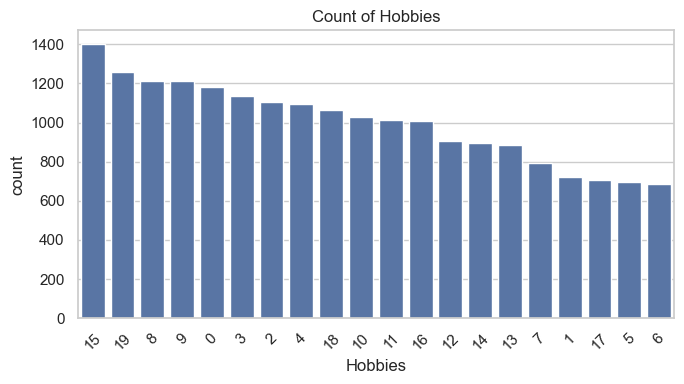

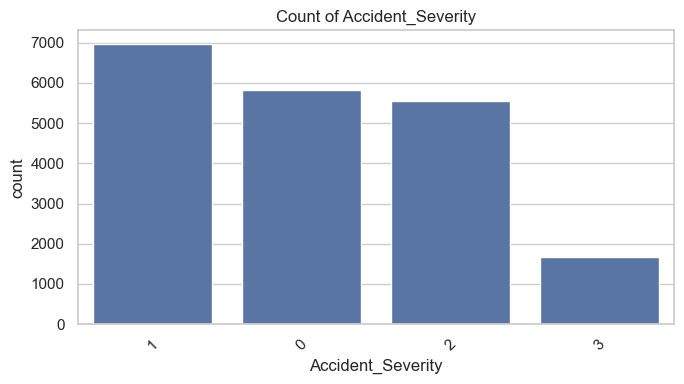

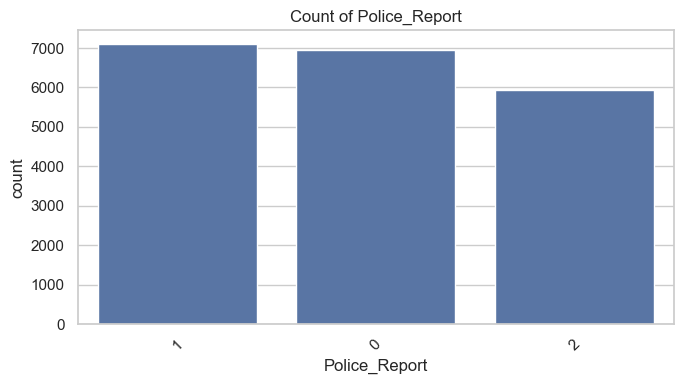

ValueError: Could not interpret value `prediction` for `hue`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("your_file_cleaned.xlsx")  # Update the filename accordingly

# Set style
sns.set(style="whitegrid")

# Define numerical and categorical columns
numerical_cols = ['Age_Insured', 'Umbrella_Limit', 'Accident_Hour', 'Witnesses', 'Vehicle_Cost']
categorical_cols = ['Gender', 'Occupation', 'Hobbies', 'Accident_Severity', 'Police_Report']
target_cols = ['Fraud_Ind', 'prediction']

# Plot numerical features
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.savefig(f"{col}_distribution.png")
    plt.show()

# Plot categorical features
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{col}_count.png")
    plt.show()

# Plot target vs prediction
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fraud_Ind', hue='prediction')
plt.title("Fraud Indicator vs Model Prediction")
plt.tight_layout()
plt.savefig("fraud_vs_prediction.png")
plt.show()
